In [210]:
import pandas as pd
from pandas import DataFrame, Series

data_prac = pd.read_csv('총데이터/일별_모델데이터.csv', encoding = 'cp949')

## 단순 선형 회귀

#### 전체 데이터 vs. PM10

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 학습 데이터 지정하기

X = data_prac.drop(columns=['PM2.5', 'PM10'], axis=1)
y = data_prac['PM10'] # 'PM2.5'

In [212]:
import numpy as np

print(X.shape)
print(y.shape)

(1491, 10)
(1491,)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [214]:
lr = LinearRegression().fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

# 0.3 ~ 0.4 사이. 훈련 세트와 테스트 세트 차이 크지 않음.

훈련 세트 점수 : 0.39
테스트 세트 점수 : 0.24


#### 날씨 제외 데이터 vs. PM10

In [215]:
X_noweather = X.drop(columns=['평균풍속', '일강수량', '평균기온'], axis=1)

In [216]:
X_noweather

,교통량합계,TPM2.5,TPM10,BPM2.5,BPM10,JPM2.5,JPM10
0,108656.0,40,67,23,57,72,164
1,114477.0,14,52,23,65,44,132
2,111557.0,30,54,29,56,28,79
3,57121.0,35,70,48,93,48,114
4,112199.0,52,97,65,115,23,63
...,...,...,...,...,...,...,...
1486,91068.0,32,61,22,40,26,44
1487,76373.0,37,70,26,48,38,66
1488,97692.0,43,77,32,53,43,75
1489,96636.0,27,46,26,40,22,40


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_noweather, y, random_state=1)

In [218]:
lr = LinearRegression().fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.30
테스트 세트 점수 : 0.18


#### 지난 PM10 데이터 vs. PM10

In [219]:
import numpy as np

X_one = np.array(X['JPM10']).reshape(-1, 1)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_one, y, random_state=1)
lr = LinearRegression().fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.15


#### 중국 PM10 데이터 vs. PM10

In [221]:
X_only10 = X_noweather.drop(columns=['TPM2.5', 'BPM2.5', 'JPM2.5'], axis=1)

X_only10

,교통량합계,TPM10,BPM10,JPM10
0,108656.0,67,57,164
1,114477.0,52,65,132
2,111557.0,54,56,79
3,57121.0,70,93,114
4,112199.0,97,115,63
...,...,...,...,...
1486,91068.0,61,40,44
1487,76373.0,70,48,66
1488,97692.0,77,53,75
1489,96636.0,46,40,40


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_only10, y, random_state=1)
lr = LinearRegression().fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.30
테스트 세트 점수 : 0.19


# 리지 회귀

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_one, y, random_state=1)

In [224]:
X_train[0]

array([129], dtype=int64)

In [225]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.15


In [226]:
#alpha=10

ridge_10 = Ridge(alpha=10).fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(ridge_10.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge_10.score(X_test, y_test)))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.15


In [227]:
#alpha=0.1

ridge_1 = Ridge(alpha=0.1).fit(X_train, y_train)

# 결과 출력
print('훈련 세트 점수 : {:.2f}'.format(ridge_1.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge_1.score(X_test, y_test)))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.15


- alpha 값을 높이면 계수를 0에 더 가깝게 만들기 때문에 훈련 세트의 성능이 나빠지지만 일반화에 도움을 준다.
- alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 계수를 거의 제한하지 않아 선형회귀모델과 비슷해진다.

In [228]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('기존 특성 개수 : ', len(X_train[0]))
print('사용한 특성 개수 : ', np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.15
기존 특성 개수 :  1
사용한 특성 개수 :  1


# 다시 !!!

In [229]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [230]:
data_prac

,PM2.5,PM10,교통량합계,평균기온,일강수량,평균풍속,TPM2.5,TPM10,BPM2.5,BPM10,JPM2.5,JPM10
0,24.0,42.0,108656.0,22.0,0.0,1.8,40,67,23,57,72,164
1,14.0,34.0,114477.0,20.6,0.0,1.5,14,52,23,65,44,132
2,11.0,25.0,111557.0,20.6,0.0,1.8,30,54,29,56,28,79
3,14.0,31.0,57121.0,21.2,0.0,1.4,35,70,48,93,48,114
4,14.0,35.0,112199.0,22.6,0.0,1.3,52,97,65,115,23,63
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,10.0,19.0,91068.0,22.7,11.5,0.9,32,61,22,40,26,44
1487,13.0,22.0,76373.0,24.9,0.0,0.9,37,70,26,48,38,66
1488,15.0,24.0,97692.0,25.1,0.0,1.2,43,77,32,53,43,75
1489,16.0,25.0,96636.0,23.7,0.0,1.0,27,46,26,40,22,40


In [231]:
data_prac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1491 non-null   float64
 1   PM10    1491 non-null   float64
 2   교통량합계   1491 non-null   float64
 3   평균기온    1491 non-null   float64
 4   일강수량    1491 non-null   float64
 5   평균풍속    1491 non-null   float64
 6   TPM2.5  1491 non-null   int64  
 7   TPM10   1491 non-null   int64  
 8   BPM2.5  1491 non-null   int64  
 9   BPM10   1491 non-null   int64  
 10  JPM2.5  1491 non-null   int64  
 11  JPM10   1491 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 139.9 KB


In [232]:
data_prac.shape

(1491, 12)

In [233]:
data = data_prac.drop(columns=['PM10'], axis=1)

data.rename(columns = {'교통량합계' : 'traffic'}, inplace=True)
data.rename(columns = {'평균기온' : 'temp'}, inplace=True)
data.rename(columns = {'일강수량' : 'rain'}, inplace=True)
data.rename(columns = {'평균풍속' : 'wind'}, inplace=True)

C:\Users\567di\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


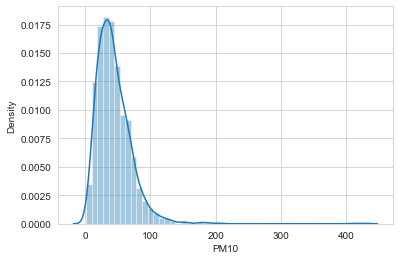

In [235]:
import seaborn as sns
sns.set_style('whitegrid')
f = sns.distplot(data_prac['PM10'])

In [132]:
X = data.drop(['PM2.5'], axis=1)
y = data['PM2.5']

In [133]:
# train, test set 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [152]:
data_some = data.drop(columns=['PM2.5'])
data_some['score'] = 3

data_some

,traffic,temp,rain,wind,TPM2.5,TPM10,BPM2.5,BPM10,JPM2.5,JPM10,score
0,108656.0,22.0,0.0,1.8,40,67,23,57,72,164,3
1,114477.0,20.6,0.0,1.5,14,52,23,65,44,132,3
2,111557.0,20.6,0.0,1.8,30,54,29,56,28,79,3
3,57121.0,21.2,0.0,1.4,35,70,48,93,48,114,3
4,112199.0,22.6,0.0,1.3,52,97,65,115,23,63,3
...,...,...,...,...,...,...,...,...,...,...,...
1486,91068.0,22.7,11.5,0.9,32,61,22,40,26,44,3
1487,76373.0,24.9,0.0,0.9,37,70,26,48,38,66,3
1488,97692.0,25.1,0.0,1.2,43,77,32,53,43,75,3
1489,96636.0,23.7,0.0,1.0,27,46,26,40,22,40,3


In [153]:
comp_df = pd.DataFrame(index=(data_some.columns))

comp_df

""
traffic
temp
rain
wind
TPM2.5
TPM10
BPM2.5
BPM10
JPM2.5
JPM10


## 1. 규제가 없는 선형모델

In [154]:
# 모델 구축 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [155]:
# 모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [156]:
# 회귀 계수 확인
coef = pd.Series(model_LR.coef_, index=X_test.columns)

In [157]:
print("R2: {:.3f} ".format(r2))

R2: 0.323 


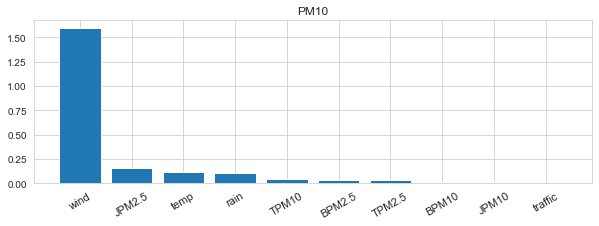

In [158]:
coef = pd.Series(data=np.abs(model_LR.coef_), 
                 index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('PM10')
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [159]:
comp_df['LR'] = np.append(model_LR.coef_, r2)

comp_df

,LR
traffic,0.000071
temp,-0.117635
rain,-0.109825
wind,-1.593795
TPM2.5,-0.031241
TPM10,0.044959
BPM2.5,0.036824
BPM10,-0.017266
JPM2.5,0.157582
JPM10,-0.011343


## 2. 릿지 모델

In [247]:
from sklearn.linear_model import Ridge

In [248]:
# a = 1일때 회귀 계수 확인
model_Ridge1 = Ridge(alpha=1)

model_Ridge1.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [249]:
# 선형 모델 평가
y_pred = model_Ridge1.predict(X_test)

r2 = r2_score(y_test, y_pred)

# alpha = 1 릿지 모델 회귀 계수 확인

coef = pd.Series(model_Ridge1.coef_, index=X_test.columns)
print("R2: {:.3f}".format(r2))
print(coef)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

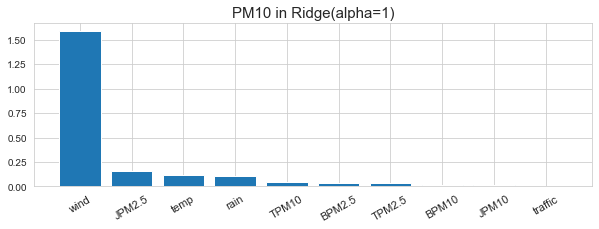

In [163]:
coef = pd.Series(data=np.abs(model_Ridge1.coef_), index=X_test.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title('PM10 in Ridge(alpha=1)', fontsize=15)
plt.bar(coef.index, coef.values, align='center')
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [164]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list = [0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train, y_train)
    
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Ridge(alpha{:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)

comp_df

,LR,Ridge(alpha0.01),Ridge(alpha1.00),Ridge(alpha10.00),Ridge(alpha100.00)
traffic,0.000071,0.000071,0.000071,0.000071,0.000072
temp,-0.117635,-0.117635,-0.117593,-0.117222,-0.114572
rain,-0.109825,-0.109825,-0.109825,-0.109817,-0.109754
wind,-1.593795,-1.593728,-1.587198,-1.530199,-1.125925
TPM2.5,-0.031241,-0.031240,-0.031228,-0.031114,-0.030290
TPM10,0.044959,0.044959,0.044950,0.044876,0.044340
BPM2.5,0.036824,0.036824,0.036839,0.036969,0.037880
BPM10,-0.017266,-0.017266,-0.017264,-0.017244,-0.017100
JPM2.5,0.157582,0.157582,0.157631,0.158060,0.161079
JPM10,-0.011343,-0.011343,-0.011355,-0.011460,-0.012196


## 마지막 시도

In [250]:
data_total = pd.read_csv('총데이터/일별_nodate데이터.csv', encoding = 'cp949')

data_total

,PM2.5,PM10,교통량합계,평균기온,일강수량,평균풍속,TPM2.5,TPM10,BPM2.5,BPM10,JPM2.5,JPM10,SO2,O3,NO2,CO
0,24.0,42.0,108656.0,22.0,0.0,1.8,40,67,23,57,72,164,0.001,0.024,0.023,0.5
1,14.0,34.0,114477.0,20.6,0.0,1.5,14,52,23,65,44,132,0.002,0.030,0.023,0.6
2,11.0,25.0,111557.0,20.6,0.0,1.8,30,54,29,56,28,79,0.003,0.032,0.021,0.5
3,14.0,31.0,57121.0,21.2,0.0,1.4,35,70,48,93,48,114,0.003,0.040,0.020,0.5
4,14.0,35.0,112199.0,22.6,0.0,1.3,52,97,65,115,23,63,0.004,0.033,0.031,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,10.0,19.0,91068.0,22.7,11.5,0.9,32,61,22,40,26,44,0.003,0.036,0.018,0.4
1487,13.0,22.0,76373.0,24.9,0.0,0.9,37,70,26,48,38,66,0.003,0.040,0.014,0.4
1488,15.0,24.0,97692.0,25.1,0.0,1.2,43,77,32,53,43,75,0.003,0.038,0.018,0.4
1489,16.0,25.0,96636.0,23.7,0.0,1.0,27,46,26,40,22,40,0.003,0.037,0.019,0.4


In [251]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1491 non-null   float64
 1   PM10    1491 non-null   float64
 2   교통량합계   1491 non-null   float64
 3   평균기온    1491 non-null   float64
 4   일강수량    1491 non-null   float64
 5   평균풍속    1491 non-null   float64
 6   TPM2.5  1491 non-null   int64  
 7   TPM10   1491 non-null   int64  
 8   BPM2.5  1491 non-null   int64  
 9   BPM10   1491 non-null   int64  
 10  JPM2.5  1491 non-null   int64  
 11  JPM10   1491 non-null   int64  
 12  SO2     1480 non-null   float64
 13  O3      1475 non-null   float64
 14  NO2     1476 non-null   float64
 15  CO      1480 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 186.5 KB


In [262]:
data_new = data_total.dropna(axis=0)

In [263]:
data_new = data_new.reset_index()

data_new.drop(columns=['index'], inplace=True)


data_new

,PM2.5,PM10,교통량합계,평균기온,일강수량,평균풍속,TPM2.5,TPM10,BPM2.5,BPM10,JPM2.5,JPM10,SO2,O3,NO2,CO
0,24.0,42.0,108656.0,22.0,0.0,1.8,40,67,23,57,72,164,0.001,0.024,0.023,0.5
1,14.0,34.0,114477.0,20.6,0.0,1.5,14,52,23,65,44,132,0.002,0.030,0.023,0.6
2,11.0,25.0,111557.0,20.6,0.0,1.8,30,54,29,56,28,79,0.003,0.032,0.021,0.5
3,14.0,31.0,57121.0,21.2,0.0,1.4,35,70,48,93,48,114,0.003,0.040,0.020,0.5
4,14.0,35.0,112199.0,22.6,0.0,1.3,52,97,65,115,23,63,0.004,0.033,0.031,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,10.0,19.0,91068.0,22.7,11.5,0.9,32,61,22,40,26,44,0.003,0.036,0.018,0.4
1465,13.0,22.0,76373.0,24.9,0.0,0.9,37,70,26,48,38,66,0.003,0.040,0.014,0.4
1466,15.0,24.0,97692.0,25.1,0.0,1.2,43,77,32,53,43,75,0.003,0.038,0.018,0.4
1467,16.0,25.0,96636.0,23.7,0.0,1.0,27,46,26,40,22,40,0.003,0.037,0.019,0.4


In [266]:
# 학습 데이터 지정하기

X = data_new.drop(columns=['PM2.5', 'PM10'], axis=1)
y = data_new['PM2.5'] # 'PM2.5'

In [269]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1469 non-null   float64
 1   PM10    1469 non-null   float64
 2   교통량합계   1469 non-null   float64
 3   평균기온    1469 non-null   float64
 4   일강수량    1469 non-null   float64
 5   평균풍속    1469 non-null   float64
 6   TPM2.5  1469 non-null   int64  
 7   TPM10   1469 non-null   int64  
 8   BPM2.5  1469 non-null   int64  
 9   BPM10   1469 non-null   int64  
 10  JPM2.5  1469 non-null   int64  
 11  JPM10   1469 non-null   int64  
 12  SO2     1469 non-null   float64
 13  O3      1469 non-null   float64
 14  NO2     1469 non-null   float64
 15  CO      1469 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 183.8 KB


In [267]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [168]:
r2 = r2_score(y_test, y_pred)

coef = pd.Series(lr.coef_, index=X_test.columns)
print(r2)
print(coef)

0.3228901128033784
traffic    0.000071
temp      -0.117635
rain      -0.109825
wind      -1.593795
TPM2.5    -0.031241
TPM10      0.044959
BPM2.5     0.036824
BPM10     -0.017266
JPM2.5     0.157582
JPM10     -0.011343
dtype: float64
